# 2023-04-10


## [3] 데이터셋 분리 및 모델 설계


1. 데이터 불러오기
2. 데이터셋 분리(x, y)
3. train, test 분리
4. 모델 설계 및 학습

In [29]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

## 1. 데이터셋 불러오기

In [5]:
df1 = pd.read_csv('./data/csv/squat_skeleton/squat_skeleton00.csv')
df1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,0,0.48919,0.16057,0.61321,0.25889,0.35581,0.26687,0.57820,0.50931,0.40290,...,0.35083,0.71905,0.66521,0.89062,0.31748,0.89753,0.77349,0.95427,0.22589,0.96714
1,1,0.49163,0.16628,0.61065,0.26227,0.35769,0.26975,0.57721,0.50601,0.40038,...,0.35245,0.71909,0.66995,0.89037,0.31936,0.89529,0.77325,0.95728,0.22997,0.96488
2,2,0.49316,0.16503,0.61508,0.26085,0.35975,0.26356,0.57301,0.50593,0.40222,...,0.35336,0.71336,0.66340,0.88895,0.32173,0.88589,0.77171,0.95321,0.23220,0.95881
3,3,0.48893,0.16060,0.61778,0.25734,0.36457,0.26332,0.57427,0.50713,0.39885,...,0.35028,0.71243,0.66760,0.88731,0.32018,0.89069,0.77949,0.95316,0.22271,0.96347
4,4,0.49480,0.17635,0.61342,0.26889,0.36214,0.27765,0.57676,0.51873,0.40431,...,0.32797,0.69362,0.67338,0.88686,0.32719,0.89165,0.79431,0.95256,0.22188,0.96047
5,5,0.48944,0.25601,0.63726,0.35166,0.34624,0.35736,0.57755,0.58792,0.39658,...,0.24506,0.72635,0.68439,0.90020,0.30145,0.90503,0.80144,0.95181,0.20816,0.96640
6,6,0.48559,0.37706,0.63719,0.46091,0.33455,0.46502,0.58080,0.66779,0.39734,...,0.19606,0.75728,0.68086,0.89946,0.31003,0.90448,0.79605,0.95214,0.21248,0.96406
7,7,0.48649,0.45040,0.64284,0.53784,0.34203,0.54252,0.58647,0.72743,0.42369,...,0.19989,0.75606,0.68974,0.89698,0.31465,0.89965,0.79344,0.95027,0.21756,0.96391
8,8,0.49161,0.46922,0.64189,0.55913,0.33911,0.55958,0.58637,0.74650,0.42207,...,0.20591,0.76168,0.69249,0.89828,0.31347,0.90253,0.79119,0.94583,0.22029,0.96077
9,9,0.49563,0.46400,0.64346,0.55170,0.34134,0.55344,0.59011,0.74098,0.42526,...,0.20621,0.75758,0.68185,0.89899,0.31762,0.90358,0.78828,0.95057,0.22012,0.96460


In [6]:
df1.set_index('Unnamed: 0', inplace=True)
df1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.48919,0.16057,0.61321,0.25889,0.35581,0.26687,0.57820,0.50931,0.40290,0.51001,...,0.35083,0.71905,0.66521,0.89062,0.31748,0.89753,0.77349,0.95427,0.22589,0.96714
1,0.49163,0.16628,0.61065,0.26227,0.35769,0.26975,0.57721,0.50601,0.40038,0.50728,...,0.35245,0.71909,0.66995,0.89037,0.31936,0.89529,0.77325,0.95728,0.22997,0.96488
2,0.49316,0.16503,0.61508,0.26085,0.35975,0.26356,0.57301,0.50593,0.40222,0.50678,...,0.35336,0.71336,0.66340,0.88895,0.32173,0.88589,0.77171,0.95321,0.23220,0.95881
3,0.48893,0.16060,0.61778,0.25734,0.36457,0.26332,0.57427,0.50713,0.39885,0.50678,...,0.35028,0.71243,0.66760,0.88731,0.32018,0.89069,0.77949,0.95316,0.22271,0.96347
4,0.49480,0.17635,0.61342,0.26889,0.36214,0.27765,0.57676,0.51873,0.40431,0.52088,...,0.32797,0.69362,0.67338,0.88686,0.32719,0.89165,0.79431,0.95256,0.22188,0.96047
5,0.48944,0.25601,0.63726,0.35166,0.34624,0.35736,0.57755,0.58792,0.39658,0.59002,...,0.24506,0.72635,0.68439,0.90020,0.30145,0.90503,0.80144,0.95181,0.20816,0.96640
6,0.48559,0.37706,0.63719,0.46091,0.33455,0.46502,0.58080,0.66779,0.39734,0.67057,...,0.19606,0.75728,0.68086,0.89946,0.31003,0.90448,0.79605,0.95214,0.21248,0.96406
7,0.48649,0.45040,0.64284,0.53784,0.34203,0.54252,0.58647,0.72743,0.42369,0.72943,...,0.19989,0.75606,0.68974,0.89698,0.31465,0.89965,0.79344,0.95027,0.21756,0.96391
8,0.49161,0.46922,0.64189,0.55913,0.33911,0.55958,0.58637,0.74650,0.42207,0.74985,...,0.20591,0.76168,0.69249,0.89828,0.31347,0.90253,0.79119,0.94583,0.22029,0.96077


In [11]:
df1.shape[0]

15

### 이미지에 포인트 그려서 확인하기

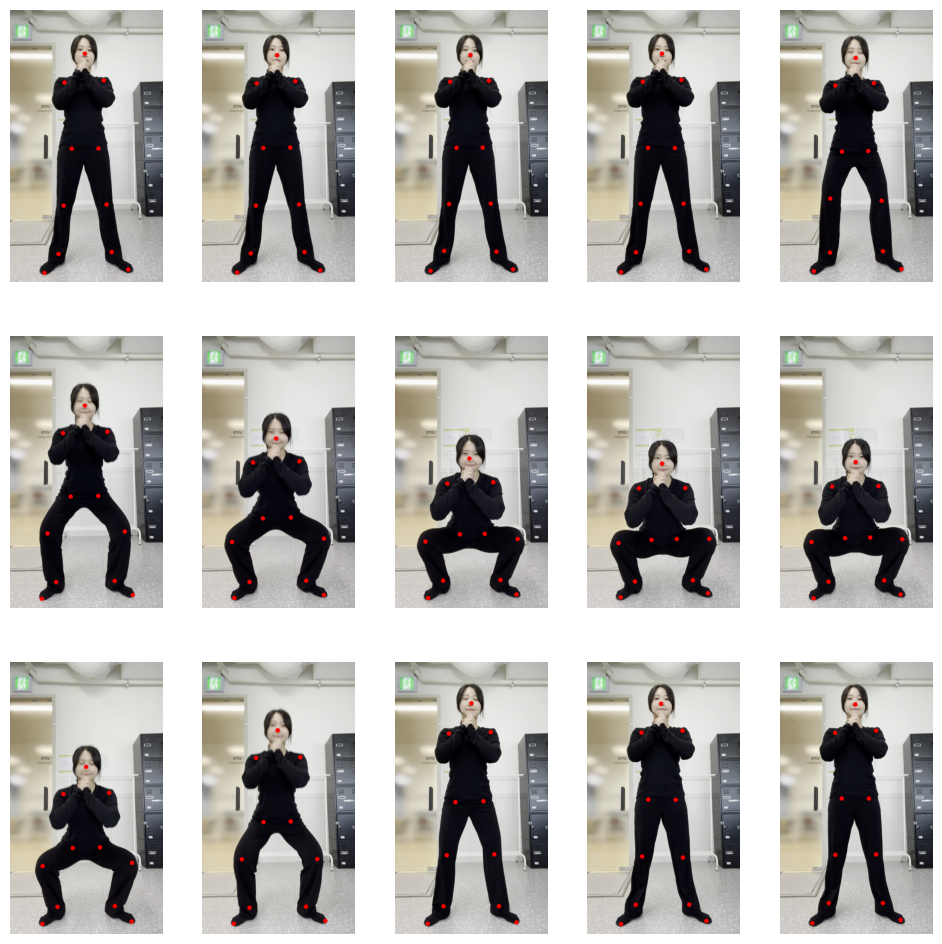

In [24]:
img_list = os.listdir('./data/images/squat_images/00/')
img_list = sorted(img_list)
fig, ax = plt.subplots(3, 5, figsize = (12,12))

for i in range(df1.shape[0]):
    background = cv2.imread('./data/images/squat_images/00/' + img_list[i])
    background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
    temp = df1.iloc[i]
    temp = np.array(temp)
    temp = temp.reshape(11, 2)
    
    for j in temp:
        cx = int(j[0]*background.shape[1])
        cy = int(j[1]*background.shape[0])
        cv2.circle(background, (cx, cy), radius=5, color=(255,0,0), thickness=10)
    
    plt.subplot(3, 5, i + 1)
    plt.imshow(background)
    plt.axis('off')

## 2. train, test data split

In [25]:
df1.iloc[[0]].shape

(1, 22)

In [26]:
df1.iloc[1:].shape

(14, 22)

In [27]:
X = df1.iloc[[0]]
y = df1.iloc[1:]

print(f'X shape = {X.shape}, y shape = {y.shape}')

X shape = (1, 22), y shape = (14, 22)


In [28]:
from sklearn.model_selection import train_test_split

